In [16]:

import torch.optim as optim

##from DQN_model import DQN
from DQN_learn import OptimizerSpec
from utils.schedule import LinearSchedule


import torch
import numpy as np
import random

%run ../game
%run ../preprocessor
%run DQN_model
%run DQN_learn
%run ../hyper_params

params = get_param_dict("../hyperparameters.json")

SEED = params["seed"]
BATCH_SIZE = params["batch_size"]
GAMMA = params["gamma"]
REPLAY_BUFFER_SIZE = params["replay_buffer_size"]
LEARNING_STARTS = params["learning_starts"]
#LEARNING_STARTS = 5 #debug for back_prop
LEARNING_FREQ = params["learning_freq"] #how often the error is calculated
FRAME_HISTORY_LEN = params["frame_history_len"] 
TARGER_UPDATE_FREQ = params["target_update_freq"]
LEARNING_RATE = params["learning_rate"]
ALPHA = params["alpha"]
EPS = params["eps"]
num_episodes = 1#params["num_episodes"]
rgb = params["rgb"]


optimizer_spec = OptimizerSpec(
        constructor=optim.RMSprop,
        kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS),
    )

exploration_schedule = LinearSchedule(1000000, 0.1)
print(exploration_schedule.value(500000))
    
n_frames = params["n_frames"]
n_channels = params["n_channels"]
original_width = params["original_width"]
original_height = params["original_height"]
scaled_width = params["scaled_width"]
scaled_height = params["scaled_height"]

game_visible = params["game_visible"]
mario_scale = params["mario_scale"]
mario_state = params["mario_state"]
mario_timer = params["mario_timer"]
mario_fps = params["mario_fps"]
level_path = params["level_path"]
preprocess = Preprocessor(n_frames, n_channels, original_height, original_width, scaled_height, scaled_width)
game = Game(game_visible, mario_scale, mario_state, mario_timer, mario_fps, level_path, preprocess, rgb, False)

agent = DDQNAgent(game, num_episodes, DQN, optimizer_spec, exploration_schedule, REPLAY_BUFFER_SIZE, BATCH_SIZE, GAMMA, LEARNING_STARTS, LEARNING_FREQ, FRAME_HISTORY_LEN, TARGER_UPDATE_FREQ)
agent.play(game.load_model("./models/2020-04-05 09_22_16_epochs_1000_gap_3_policy.pt"))
#agent.train()


0.55
Loading model
Starting play episode 0


C:\Users\Jonas\Desktop\Uni\Year 4\ECM3401 Individual Literature and Review Project\dev\marioai\mario-rl-client\ddqn_2\DQN_learn.py:314: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  action = Q(Variable(obs, volatile=True)).data.max(1)[1].view(-1, 1).cpu()


1.3754997
7.501667
11.345367
13.756996
15.270103
16.219467
16.815125
-100.0


In [83]:
optimizer_spec = OptimizerSpec(
        constructor=optim.RMSprop,
        kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS),
    )

timesteps = 10**3
start = 1.0

exploration_schedule = LinearSchedule(timesteps, 0.1, start)

data = np.array([])

for n in range(timesteps):
    data = np.append(data, exploration_schedule.value(n + 1))

import matplotlib.pyplot as plt





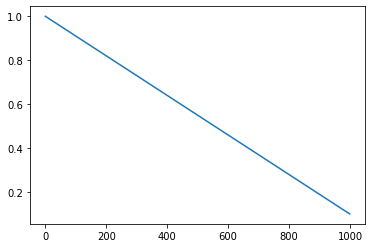

In [84]:
plt.plot(data)

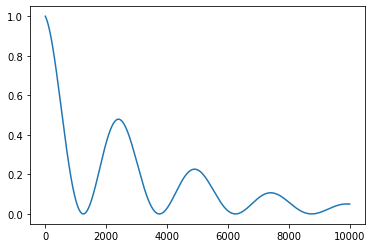

In [78]:
import math
exp = 4
eps_start = 1.0
decay = 0.9997
m = 4
N = 10**exp
def sin_eps(eps_start, decay, i_episode, m, N):
    return eps_start * decay ** i_episode * (1/2) * (1 + math.cos((2*math.pi * i_episode * m) / N))

data_2 = np.array([])
for n in range(N):
    eps = sin_eps(eps_start, decay, n + 1, m, N)
    data_2 = np.append(data_2, eps)
    
plt.plot(data_2)

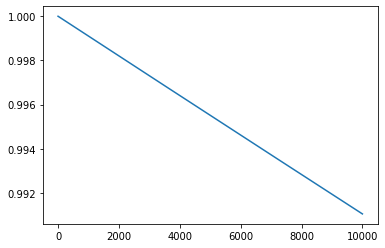

In [82]:
def oc_eps(eps_min, eps_start, num_steps, eps_decay):
    eps = eps_min + (eps_start - eps_min) * math.exp(-num_steps / eps_decay)
    return eps
    
eps_start=1.0
eps_min=0.1
eps_decay=int(1e6)

data_3 = np.array([])

for n in range(N):
    eps = oc_eps(eps_min, eps_start, n + 1, eps_decay)
    data_3 = np.append(data_3, eps)
    
    
plt.plot(data_3)